In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# Veri setini yükleyin
data = pd.read_csv("merged2_data.csv")

# "Close" değişkenini alın
close_data = data["Close"].values

In [23]:
# Veri setini ölçeklendirin
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data.reshape(-1, 1))

# Öznitelikler ve hedef değişkeni ayırın
X = scaled_data[:-1]
y = scaled_data[1:]

In [24]:
# Eğitim ve test veri setlerini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
num_epochs = 50
batch_size = 32

# Modeli derleme ve eğitim
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/50
80/80 [==============================] - 1s 4ms/step - loss: 0.0230 - val_loss: 0.0266
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 3.7649e-04
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0239e-04 - val_loss: 3.3855e-04
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0029e-04 - val_loss: 3.2014e-04
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0163e-04 - val_loss: 3.1838e-04
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0008e-04 - val_loss: 3.3094e-04
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0435e-04 - val_loss: 3.1738e-04
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0228e-04 - val_loss: 3.1514e-04
Epoch 9/50
80/80 [==============================] - 0s 1ms/step - loss: 1.0097e-04 - val_loss: 3.1336e-04
Epoch 10/50
80/80 [==============================] - 0s 1m

In [27]:
y_test_pred = model.predict(X_test)
y_test_pred_denorm = scaler.inverse_transform(y_test_pred)
y_test_pred_reshaped = y_test_pred_denorm[:, 0].reshape(-1, 1)

y_test_denorm = scaler.inverse_transform(y_test)
y_test_denorm_reshaped = y_test_denorm[:, 0].reshape(-1, 1)



20/20 [==============================] - 0s 584us/step


In [28]:
print(y_test_denorm.shape)


(633, 1)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# MSE hesaplama
MSE = mean_squared_error(y_test_denorm, y_test_pred_denorm)
print("Mean Squared Error (MSE):", MSE)

# RMSE hesaplama
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

# MAE hesaplama
MAE= mean_absolute_error(y_test_denorm, y_test_pred_denorm)
print("Mean Absolute Error (MAE):", MAE)

# R2 skoru hesaplama
R2 = r2_score(y_test_denorm, y_test_pred_denorm)
print("R2 Score:", R2)

Mean Squared Error (MSE): 1364058.9490504838
Root Mean Squared Error (RMSE): 1167.9293424905823
Mean Absolute Error (MAE): 767.8798195535151
R2 Score: 0.9926119057656592


In [30]:
dates = data['Date'].values[-633:]
dates = dates[-len(y_test_denorm):]
y_test_pred_denorm = y_test_pred_denorm[:len(dates)]


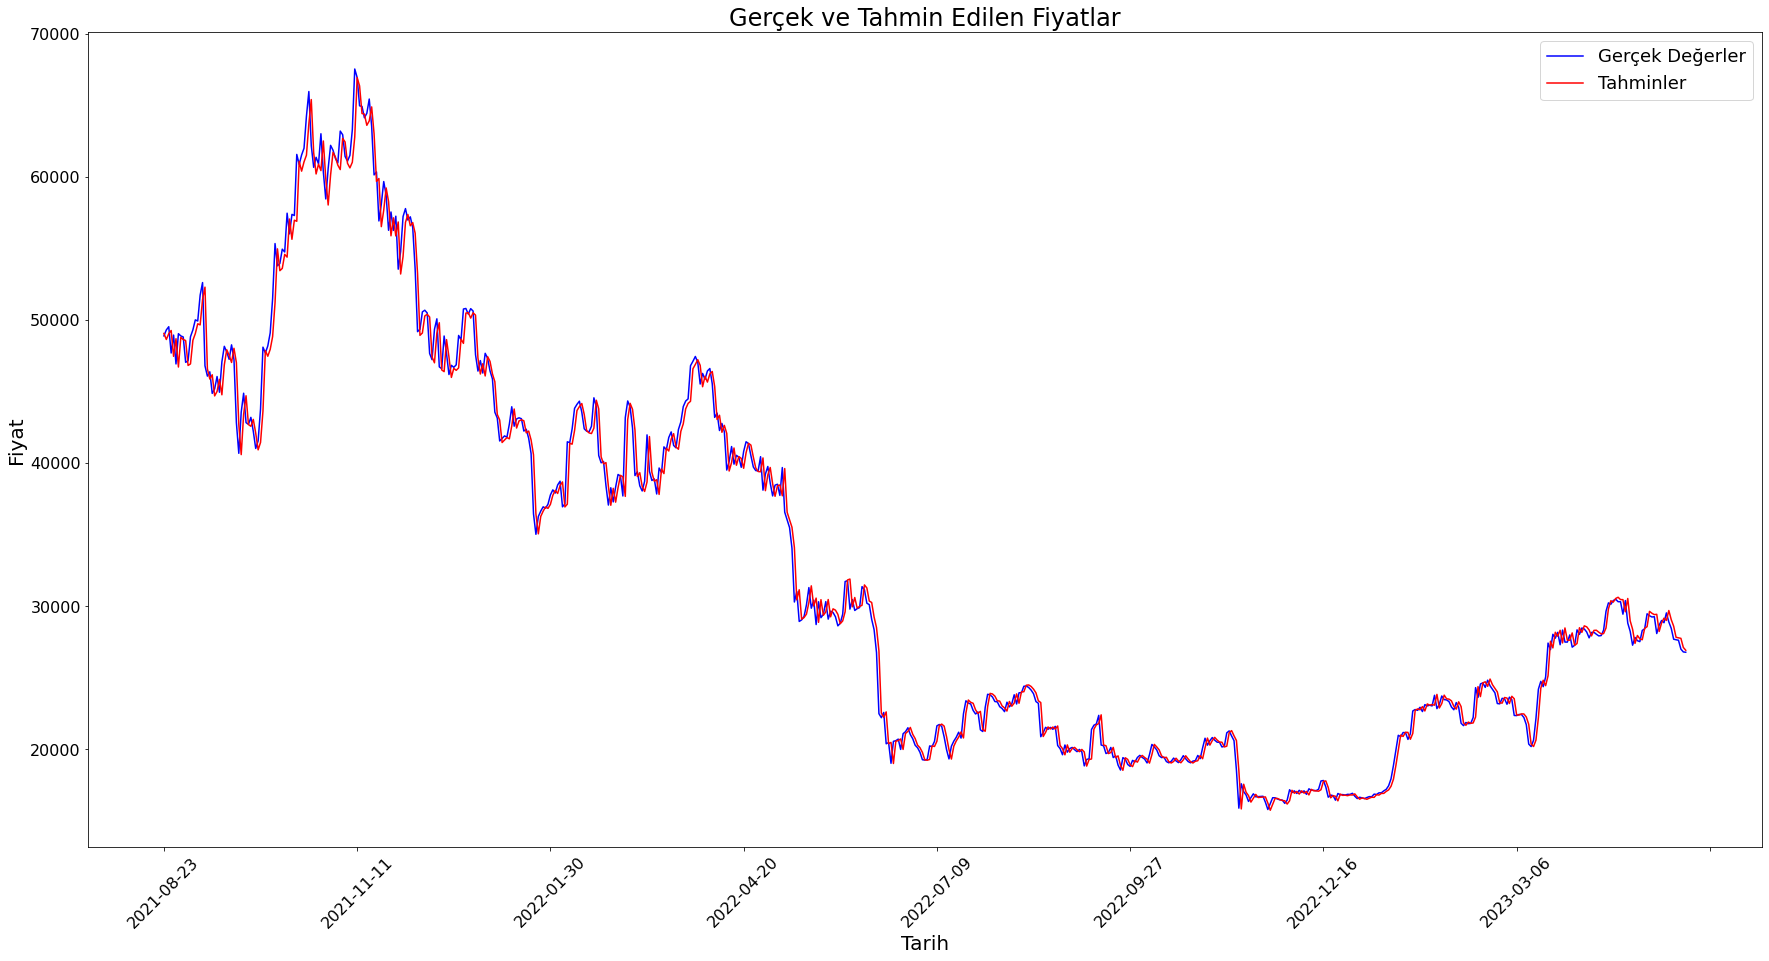

In [31]:
import matplotlib.pyplot as plt

# Verilerin uygun boyutlarda olduğundan emin olmak için kesme işlemi yapın
dates = data['Date'].values[-631:]
y_test_denorm = y_test_denorm[:-2]
dates = dates[-len(y_test_denorm):]
y_test_pred_denorm = y_test_pred_denorm[:len(dates)]
# Grafiğin boyutunu ayarla

plt.figure(figsize=(30, 15))
plt.plot(dates, y_test_denorm[:, 0], color='blue', label='Gerçek Değerler')
plt.plot(dates, y_test_pred_denorm[:, 0], color='red', label='Tahminler')
plt.xlabel('Tarih', fontsize=20)
plt.ylabel('Fiyat', fontsize=20)
plt.title('Gerçek ve Tahmin Edilen Fiyatlar', fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend(fontsize=18)
plt.show()





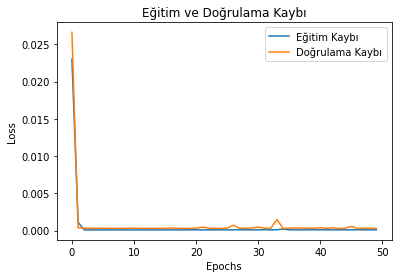

In [32]:
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
LSTM_ERROR5 = pd.DataFrame.from_dict(results, orient='index').T

# Çıktıyı metin dosyasına aktar
output_text = LSTM_ERROR5.to_string(index=False)

# Metin dosyasını kaydet
with open('LSTM_ERROR5.txt', 'w') as file:
    file.write(output_text)